<a href="https://colab.research.google.com/github/ProfBB/excellent_store_prediction/blob/main/excellent_store_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Import the test data and train data

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
#Print the train data head for inspection
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [6]:
#print the last 5 rows of the data set
train.tail()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,NaN,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,NaN,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,NaN,Cluster 2,Supermarket Type1,5685.93
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00
4989,NCZ54,BABATUNJI049,NCZ54_BABATUNJI049,14.65,Low Sugar,0.083489,Household,403.39,2006,Medium,Cluster 1,Supermarket Type1,17870.07


In [7]:
#Print the data shape and the number of rows and columns
train.shape
print("The number of rows:",train.shape[0])
print("The number of columns:",train.shape[1])

The number of rows: 4990
The number of columns: 13


In [8]:
#Check for null dataset
train.isnull().sum()

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,802
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,1450


Data Visualization

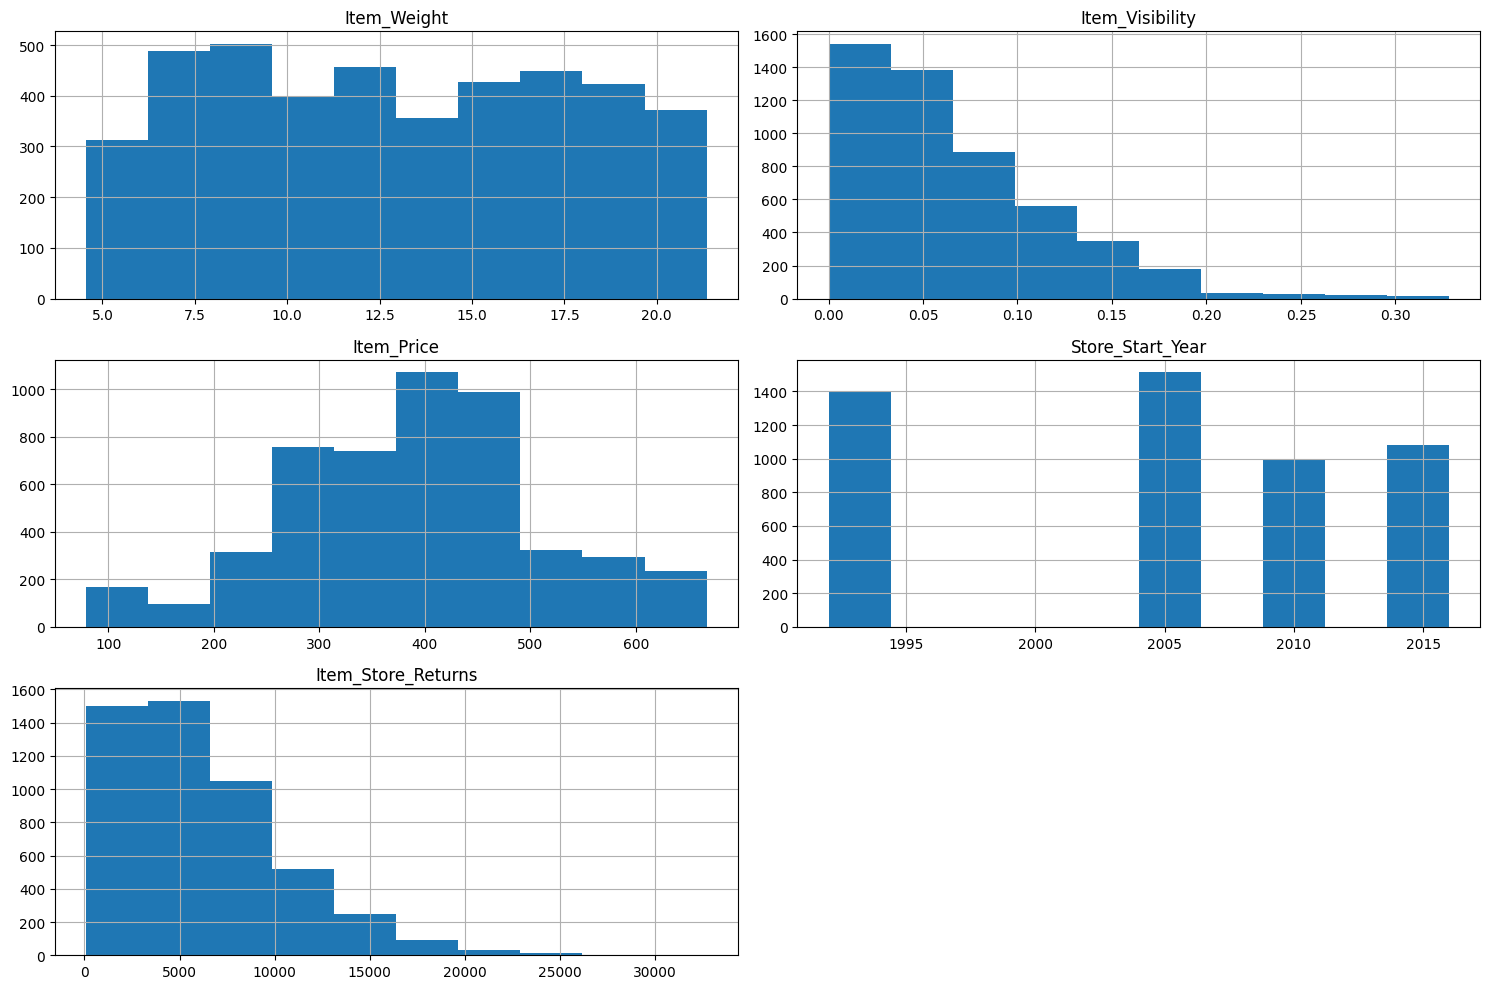

In [9]:
# Explore the distribution of numerical features
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


Fill missing data using median and mode

In [10]:
#Filling missing data for train dataset
item_weight_median = train['Item_Weight'].median()
train['Item_Weight'].fillna(item_weight_median, inplace=True)
store_size_mode = train['Store_Size'].mode()[0]
train['Store_Size'].fillna(store_size_mode, inplace=True)
train.isnull().sum()

/tmp/ipython-input-10-499396359.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Weight'].fillna(item_weight_median, inplace=True)
/tmp/ipython-input-10-499396359.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,0
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,0


In [11]:
#filling the missing data for test dataset
item_weight_median = train['Item_Weight'].median()
test['Item_Weight'].fillna(item_weight_median, inplace=True)
store_size_mode = test['Store_Size'].mode()[0]
test['Store_Size'].fillna(store_size_mode, inplace=True)
test.isnull().sum()

/tmp/ipython-input-11-322526602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Item_Weight'].fillna(item_weight_median, inplace=True)
/tmp/ipython-input-11-322526602.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,0
Item_ID,0
Store_ID,0
Item_Store_ID,0
Item_Weight,0
Item_Sugar_Content,0
Item_Visibility,0
Item_Type,0
Item_Price,0
Store_Start_Year,0
Store_Size,0


Inspecting the distribution of each item in the datasets

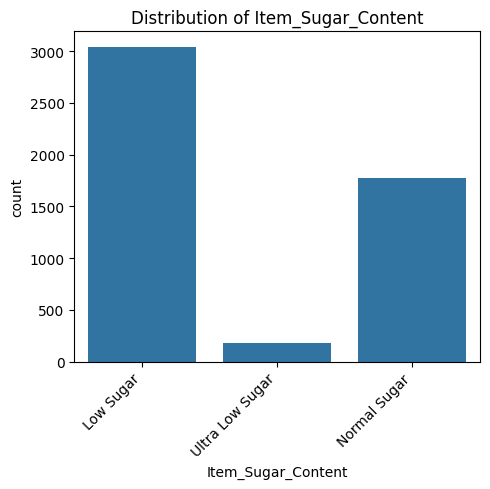

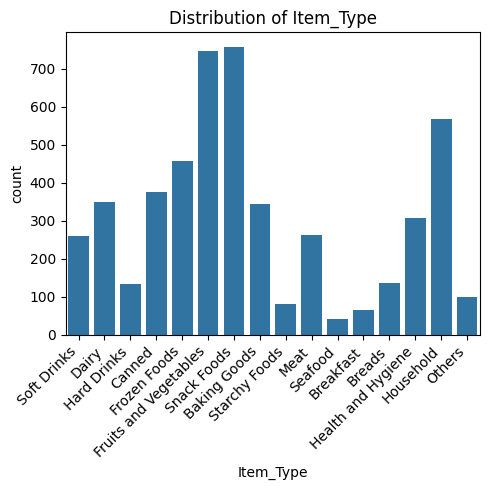

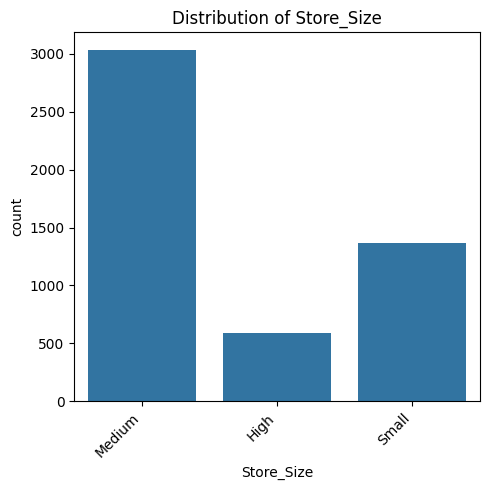

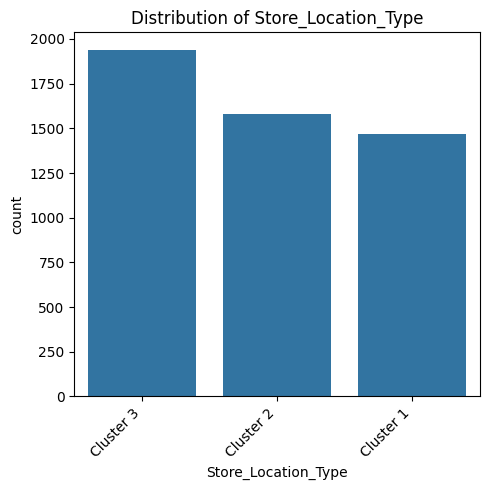

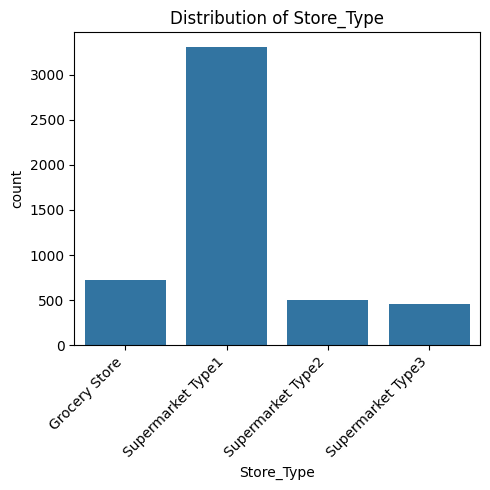

In [12]:
categorical_features = ['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

for feature in categorical_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, data=train)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

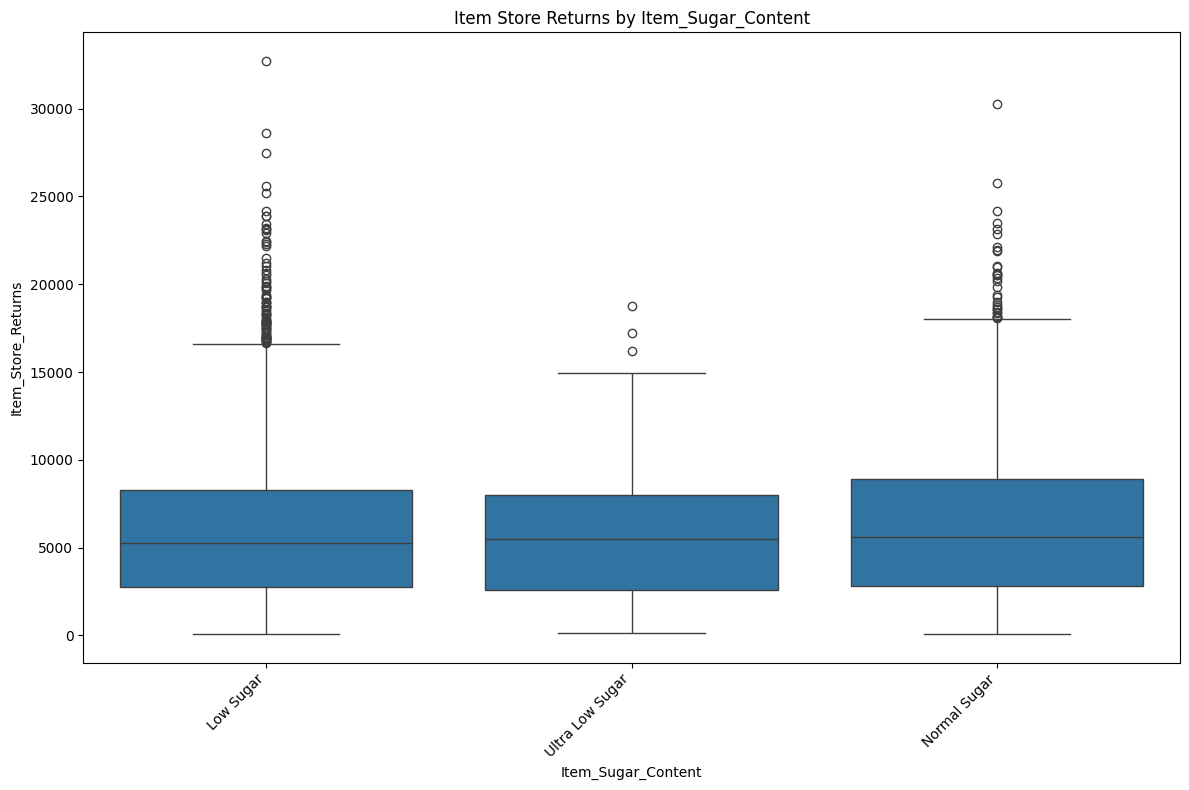

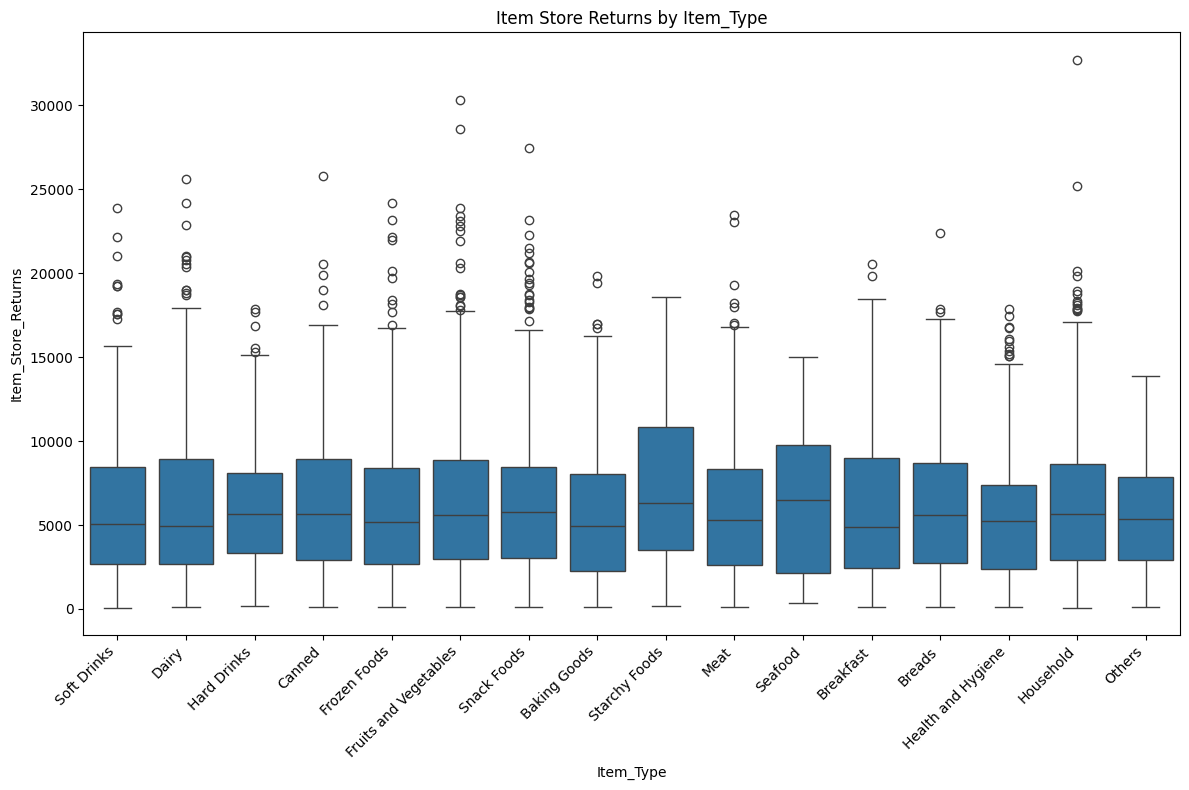

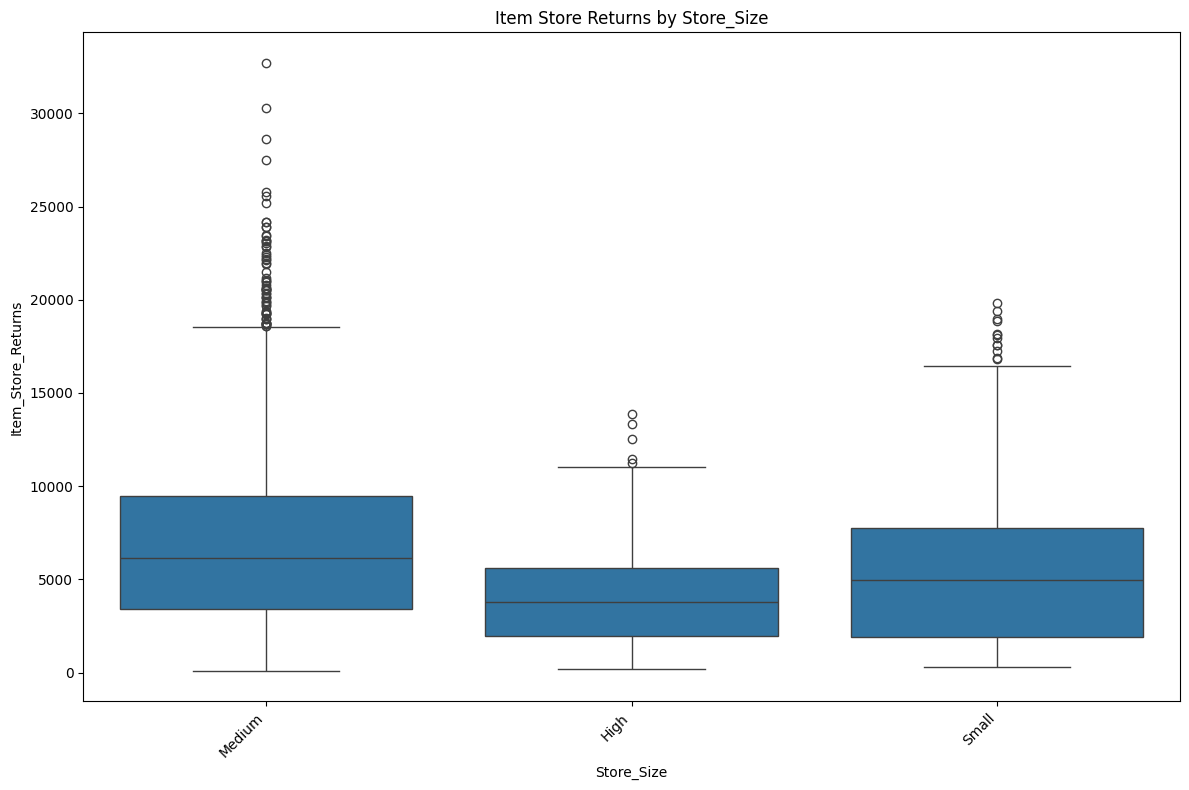

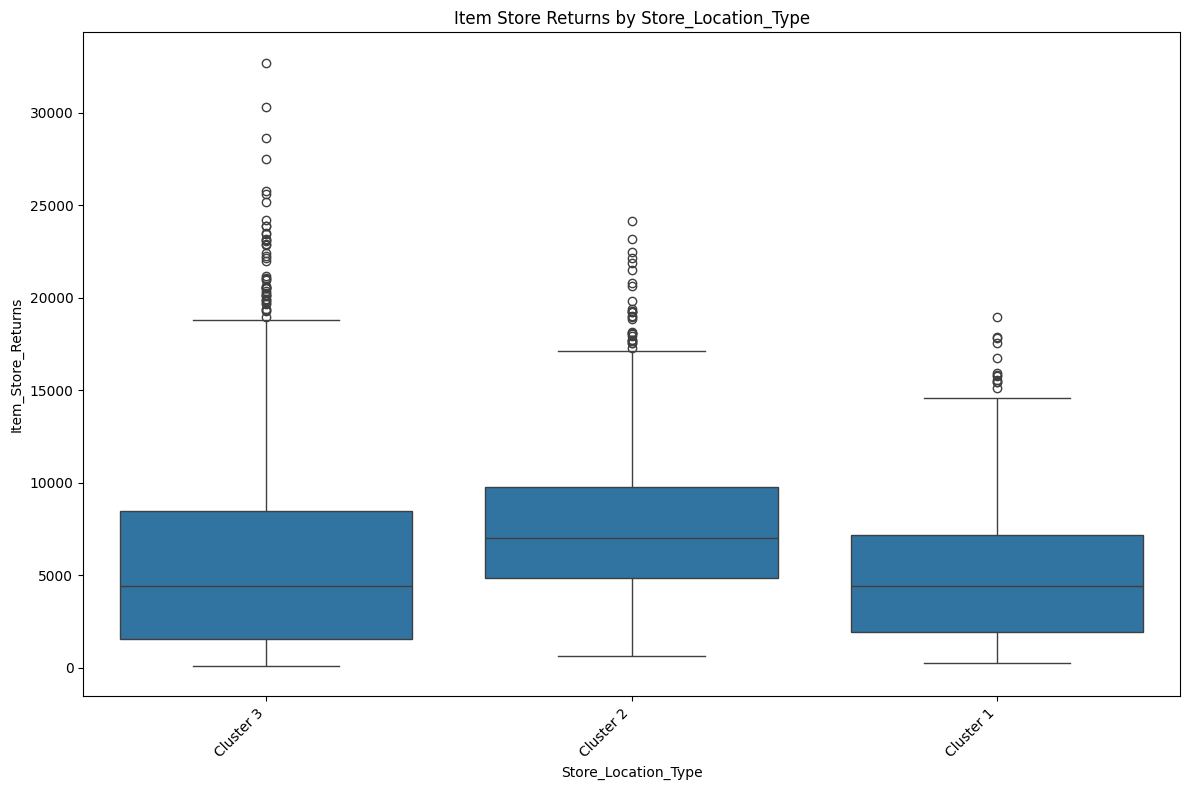

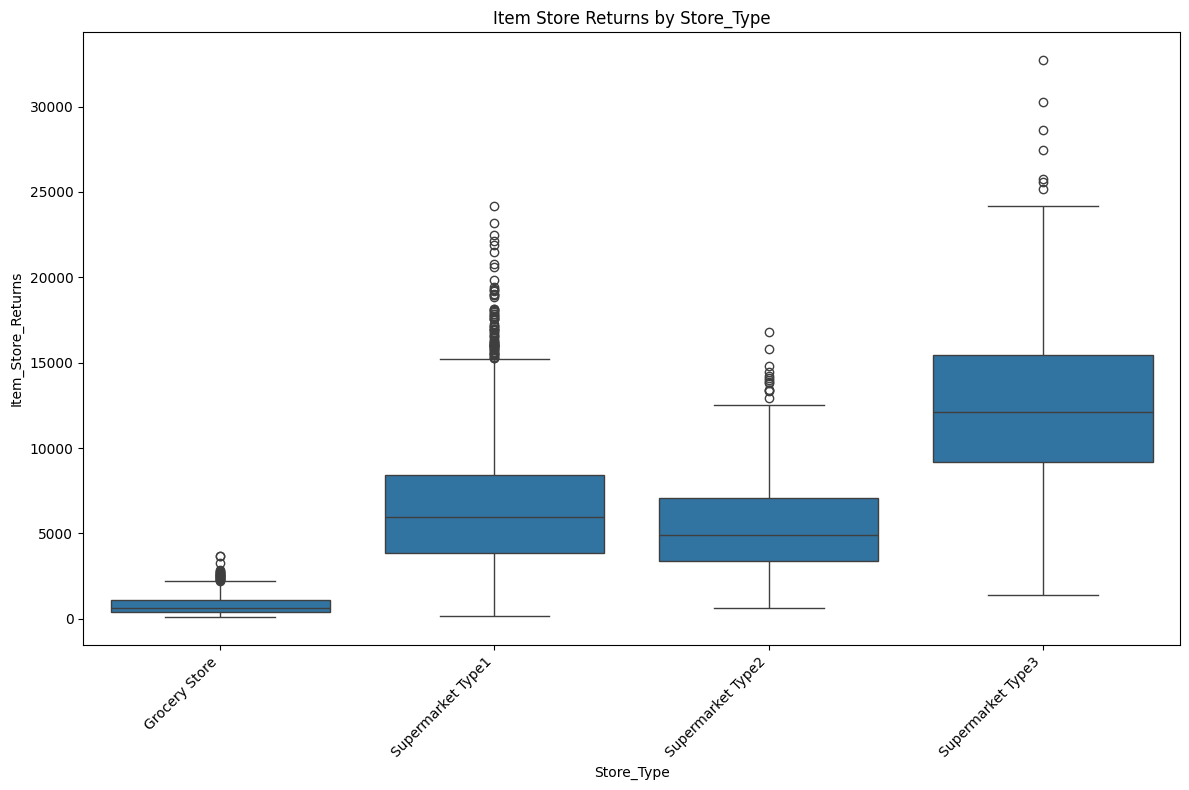

In [13]:
categorical_features = ['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=feature, y='Item_Store_Returns', data=train)
    plt.title(f'Item Store Returns by {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

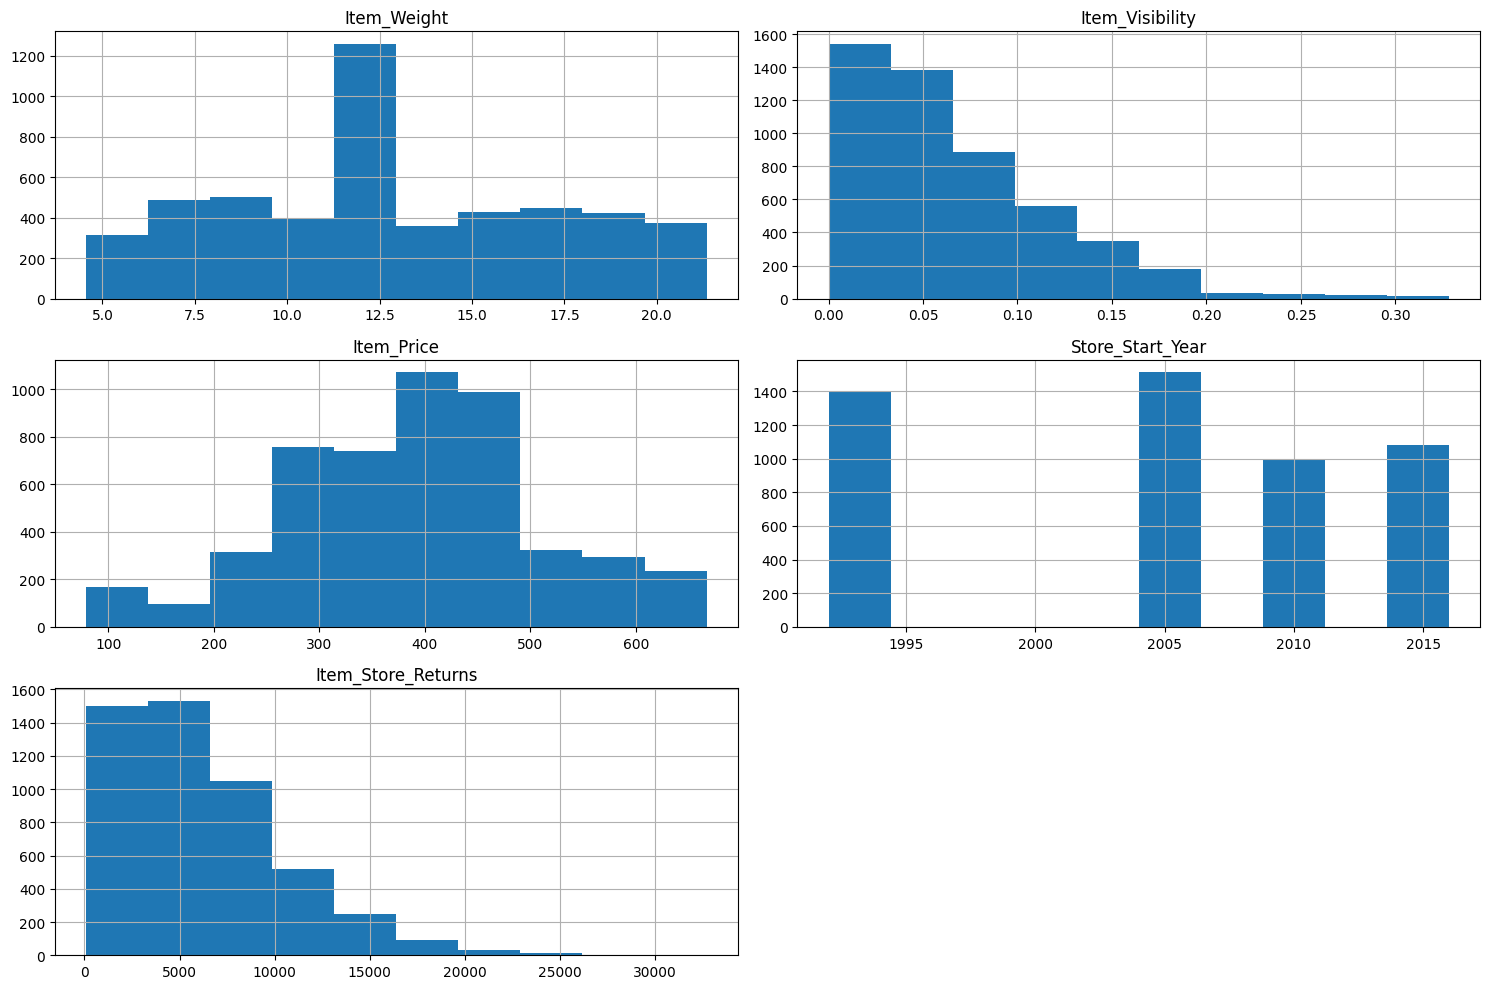

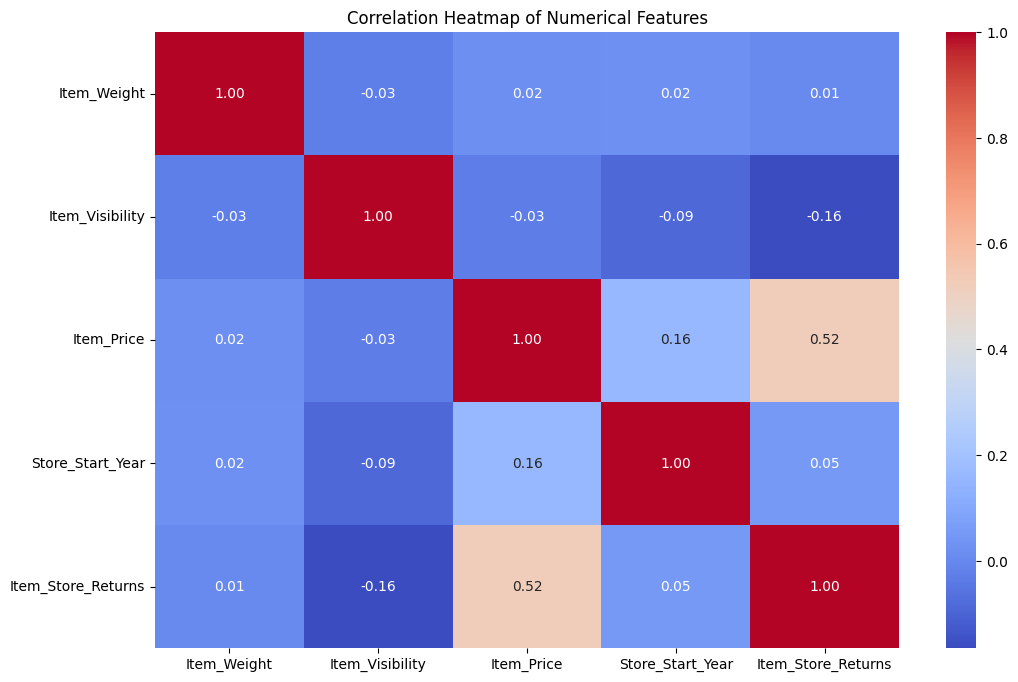

In [14]:
# Explore the distribution of numerical features
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()
# Correlation Heatmap
# Calculate the correlation matrix
correlation_matrix = train.select_dtypes(include=np.number).corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [33]:
current_year = 2025
test['Store_Age'] = current_year - test['Store_Start_Year']
test['Item_Type_Code'] = test['Item_ID'].str[:2]
test['Item_Store_Type_Combined'] = test['Item_Type'] + '_' + test['Store_Type']
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Store_Age,Item_Type_Code,Item_Store_Type_Combined
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,Medium,Cluster 3,Grocery Store,20,DR,Soft Drinks_Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1,31,DR,Soft Drinks_Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1,31,DR,Soft Drinks_Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,Medium,Cluster 3,Grocery Store,20,DR,Soft Drinks_Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1,31,DR,Soft Drinks_Supermarket Type1


In [32]:
current_year = 2025
test['Store_Age'] = current_year - test['Store_Start_Year']
test['Item_Type_Code'] = test['Item_ID'].str[:2]
test['Item_Store_Type_Combined'] = test['Item_Type'] + '_' + test['Store_Type']
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Store_Age,Item_Type_Code,Item_Store_Type_Combined
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,Medium,Cluster 3,Grocery Store,20,DR,Soft Drinks_Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1,31,DR,Soft Drinks_Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1,31,DR,Soft Drinks_Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,Medium,Cluster 3,Grocery Store,20,DR,Soft Drinks_Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1,31,DR,Soft Drinks_Supermarket Type1


In [34]:
categorical_cols = train.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Item_ID', 'Store_ID', 'Item_Store_ID']]
train_encoded = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

numerical_cols = train.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Item_Store_Returns']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_encoded[numerical_cols] = scaler.fit_transform(train_encoded[numerical_cols])

display(train_encoded.head())

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Store_Age,Item_Sugar_Content_Normal Sugar,...,Item_Store_Type_Combined_Snack Foods_Supermarket Type2,Item_Store_Type_Combined_Snack Foods_Supermarket Type3,Item_Store_Type_Combined_Soft Drinks_Grocery Store,Item_Store_Type_Combined_Soft Drinks_Supermarket Type1,Item_Store_Type_Combined_Soft Drinks_Supermarket Type2,Item_Store_Type_Combined_Soft Drinks_Supermarket Type3,Item_Store_Type_Combined_Starchy Foods_Grocery Store,Item_Store_Type_Combined_Starchy Foods_Supermarket Type1,Item_Store_Type_Combined_Starchy Foods_Supermarket Type2,Item_Store_Type_Combined_Starchy Foods_Supermarket Type3
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,-0.292176,0.030513,-0.287047,0.026132,709.08,-0.026132,False,...,False,False,True,False,False,False,False,False,False,False
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,-0.292176,-0.490159,-0.301708,-1.301998,6381.69,1.301998,False,...,False,False,False,True,False,False,False,False,False,False
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,-0.292176,-0.485151,-0.343596,1.112784,6381.69,-1.112784,False,...,False,False,False,True,False,False,False,False,False,False
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,-0.292176,-0.486372,-0.307991,1.354262,2127.23,-1.354262,False,...,False,False,False,False,True,False,False,False,False,False
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,-0.292176,-1.261307,-0.310086,0.750567,2481.77,-0.750567,False,...,False,False,False,True,False,False,False,False,False,False


In [35]:
categorical_cols_test = test.select_dtypes(include='object').columns.tolist()
categorical_cols_test = [col for col in categorical_cols_test if col not in ['Item_ID', 'Store_ID', 'Item_Store_ID']]
test_encoded = pd.get_dummies(test, columns=categorical_cols_test, drop_first=True)

numerical_cols_test = test.select_dtypes(include=np.number).columns.tolist()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_encoded[numerical_cols_test] = scaler.fit_transform(test_encoded[numerical_cols_test])

display(test_encoded.head())

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Store_Age,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,...,Item_Store_Type_Combined_Snack Foods_Supermarket Type2,Item_Store_Type_Combined_Snack Foods_Supermarket Type3,Item_Store_Type_Combined_Soft Drinks_Grocery Store,Item_Store_Type_Combined_Soft Drinks_Supermarket Type1,Item_Store_Type_Combined_Soft Drinks_Supermarket Type2,Item_Store_Type_Combined_Soft Drinks_Supermarket Type3,Item_Store_Type_Combined_Starchy Foods_Grocery Store,Item_Store_Type_Combined_Starchy Foods_Supermarket Type1,Item_Store_Type_Combined_Starchy Foods_Supermarket Type2,Item_Store_Type_Combined_Starchy Foods_Supermarket Type3
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,-1.090387,3.015274,0.896659,0.011764,-0.011764,True,False,...,False,False,True,False,False,False,False,False,False,False
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,-1.090387,1.269887,0.924150,-1.282956,1.282956,True,False,...,False,False,False,True,False,False,False,False,False,False
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,-1.304682,0.346660,0.992331,-1.282956,1.282956,False,False,...,False,False,False,True,False,False,False,False,False,False
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,-1.615166,-1.076694,0.966213,0.011764,-0.011764,True,False,...,False,False,True,False,False,False,False,False,False,False
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,-1.615166,-1.172803,0.968962,-1.282956,1.282956,True,False,...,False,False,False,True,False,False,False,False,False,False


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X = train_encoded.drop(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Store_Returns'], axis=1)
y = train_encoded['Item_Store_Returns']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [37]:
from sklearn.metrics import mean_squared_error

y_pred1 = model1.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)

print(f'Mean Squared Error (MSE1): {mse1:.2f}')
print(f'Root Mean Squared Error (RMSE1): {rmse1:.2f}')

Mean Squared Error (MSE1): 8882266.75
Root Mean Squared Error (RMSE1): 2980.31


Prediction for test Dataset

In [39]:
# Ensure the test data has the same columns as the training data
train_columns = X_train.columns.tolist()
test_encoded = test_encoded.reindex(columns=train_columns, fill_value=0)


# Step 3: Make predictions!
predictions = model1.predict(test_encoded)

# Step 4: Look at your predictions
print("First 10 predictions:")
print(predictions[:10])

# If you want to save predictions to a file:
# Create a submission dataframe
submission = pd.DataFrame({
    'Item_ID': test['Item_ID'],  # or whatever ID column you have
    'Predicted_Returns': predictions
})

# Save to CSV
submission.to_csv('my_submission.csv', index=False)
print("Predictions saved to 'my_submission.csv'!")

First 10 predictions:
[3594.07474373 7118.03271995 7465.81919719 4957.49175097 7124.39890095
 6229.27553194 8459.49579706 6229.27553194 4624.17597379 6560.45156617]
Predictions saved to 'my_submission.csv'!
